In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
df=pd.read_csv("/content/pizza_v1.csv")
df

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no
...,...,...,...,...,...,...,...,...
124,E,"Rp39,000",8.5,tuna,spicy tuna,small,yes,yes
125,E,"Rp72,000",12.0,tuna,spicy tuna,medium,yes,yes
126,E,"Rp99,000",14.0,tuna,spicy tuna,large,yes,yes
127,E,"Rp44,000",8.5,meat,BBQ_meat_fiesta,small,yes,no


In [ ]:
model='diameter ~ C(company,Sum)+C(price_rupiah,Sum)+C(topping,Sum)+C(variant,Sum)+C(size,Sum)+C(extra_sauce,Sum)+C(extra_cheese,Sum)'
model_fit=smf.ols(model,data=df).fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:               diameter   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.550e+28
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:20:27   Log-Likelihood:                 3944.2
No. Observations:                 129   AIC:                            -7758.
Df Residuals:                      64   BIC:                            -7573.
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [ ]:
conjoint_attributes = ['company','price_rupiah','topping','variant','size','extra_sauce','extra_cheese']

In [ ]:
level_name = []
part_worth = []
part_worth_range = []
important_levels = {}
end = 1  # Initialize index for coefficient in params

for item in conjoint_attributes:
    nlevels = len(list(np.unique(df[item])))
    level_name.append(list(np.unique(df[item])))

    begin = end
    end = begin + nlevels -1

    new_part_worth = list(model_fit.params[begin:end])
    new_part_worth.append((-1)*sum(new_part_worth))
    important_levels[item] = np.argmax(new_part_worth)
    part_worth.append(new_part_worth)
    print(item)
    #print(part_worth)
    part_worth_range.append(max(new_part_worth) - min(new_part_worth))
    # next iteration
print("-------------------------------------------------------------")
print("level name:")
print(level_name)
print("npw with sum element:")
print(new_part_worth)
print("imp level:")
print(important_levels)
print("part worth:")
print(part_worth)
print("part_worth_range:")
print(part_worth_range)
print(len(part_worth))
print("important levels:")
print(important_levels)

company
price_rupiah
topping
variant
size
extra_sauce
extra_cheese
-------------------------------------------------------------
level name:
[['A', 'B', 'C', 'D', 'E'], ['Rp105,000', 'Rp110,000', 'Rp114,000', 'Rp115,000', 'Rp119,000', 'Rp120,000', 'Rp123,000', 'Rp126,500', 'Rp140,000', 'Rp149,000', 'Rp155,000', 'Rp188,000', 'Rp198,000', 'Rp23,500', 'Rp230,000', 'Rp235,000', 'Rp248,000', 'Rp28,000', 'Rp31,000', 'Rp32,000', 'Rp33,000', 'Rp35,000', 'Rp39,000', 'Rp44,000', 'Rp46,000', 'Rp49,000', 'Rp51,000', 'Rp54,000', 'Rp60,000', 'Rp69,000', 'Rp70,000', 'Rp72,000', 'Rp75,000', 'Rp76,000', 'Rp78,000', 'Rp83,000', 'Rp84,000', 'Rp90,000', 'Rp92,000', 'Rp93,000', 'Rp96,000', 'Rp98,000', 'Rp99,000'], ['beef', 'black papper', 'chicken', 'meat', 'mozzarella', 'mushrooms', 'onion', 'papperoni', 'sausage', 'smoked beef', 'tuna', 'vegetables'], ['BBQ_meat_fiesta', 'BBQ_sausage', 'american_classic', 'american_favorite', 'classic', 'crunchy', 'double_decker', 'double_mix', 'double_signature', 'extra

In [ ]:
attribute_importance = []
for i in part_worth_range:
    #print(i)
    attribute_importance.append(round(100*(i/sum(part_worth_range)),2))
print(attribute_importance)

[0.0, 32.2, 4.1, 18.34, 45.36, 0.0, 0.0]


In [ ]:
part_worth_dict={}
attrib_level={}
for item,i in zip(conjoint_attributes,range(0,len(conjoint_attributes))):
    print("Attribute :",item)
    print("Relative importance of attribute ",attribute_importance[i])
    print("Level wise part worths: ")
    for j in range(0,len(level_name[i])):
        print(i)
        print(j)
        print("{}:{}".format(level_name[i][j],part_worth[i][j]))
        part_worth_dict[level_name[i][j]]=part_worth[i][j]
        attrib_level[item]=(level_name[i])
        print(j)
part_worth_dict

Attribute : company
Relative importance of attribute  0.0
Level wise part worths: 
0
0
A:3.2751579226442118e-15
0
0
1
B:6.661338147750939e-16
1
0
2
C:-3.9968028886505635e-15
2
0
3
D:1.1102230246251565e-15
3
0
4
E:-1.0547118733938987e-15
4
Attribute : price_rupiah
Relative importance of attribute  32.2
Level wise part worths: 
1
0
Rp105,000:0.18055536065185152
0
1
1
Rp110,000:-0.5426087478126194
1
1
2
Rp114,000:-0.7791357886662533
2
1
3
Rp115,000:0.548162963442242
3
1
4
Rp119,000:0.5481629634422083
4
1
5
Rp120,000:1.3000236350040408
5
1
6
Rp123,000:-0.26906584486131074
6
1
7
Rp126,500:-0.2690658448613148
7
1
8
Rp140,000:1.9573912521873797
8
1
9
Rp149,000:1.720864211333735
9
1
10
Rp155,000:-0.69997636499592
10
1
11
Rp188,000:-1.2940219146160312
11
1
12
Rp198,000:0.28513750905430485
12
1
13
Rp23,500:-0.24909373484933867
13
1
14
Rp230,000:2.205978085383968
14
1
15
Rp235,000:2.2851375090542865
15
1
16
Rp248,000:-1.7148624909457342
16
1
17
Rp28,000:-0.2747029006364361
17
1
18
Rp31,000:-0.249

{'A': 3.2751579226442118e-15,
 'B': 6.661338147750939e-16,
 'C': -3.9968028886505635e-15,
 'D': 1.1102230246251565e-15,
 'E': -1.0547118733938987e-15,
 'Rp105,000': 0.18055536065185152,
 'Rp110,000': -0.5426087478126194,
 'Rp114,000': -0.7791357886662533,
 'Rp115,000': 0.548162963442242,
 'Rp119,000': 0.5481629634422083,
 'Rp120,000': 1.3000236350040408,
 'Rp123,000': -0.26906584486131074,
 'Rp126,500': -0.2690658448613148,
 'Rp140,000': 1.9573912521873797,
 'Rp149,000': 1.720864211333735,
 'Rp155,000': -0.69997636499592,
 'Rp188,000': -1.2940219146160312,
 'Rp198,000': 0.28513750905430485,
 'Rp23,500': -0.24909373484933867,
 'Rp230,000': 2.205978085383968,
 'Rp235,000': 2.2851375090542865,
 'Rp248,000': -1.7148624909457342,
 'Rp28,000': -0.2747029006364361,
 'Rp31,000': -0.24909373484935704,
 'Rp32,000': -0.18654247670924345,
 'Rp33,000': -0.2490937348493456,
 'Rp35,000': -0.01277277560721668,
 'Rp39,000': 0.21802034671040035,
 'Rp44,000': -0.14266429078175236,
 'Rp46,000': -0.3929881

Text(0, 0.5, 'Importance')

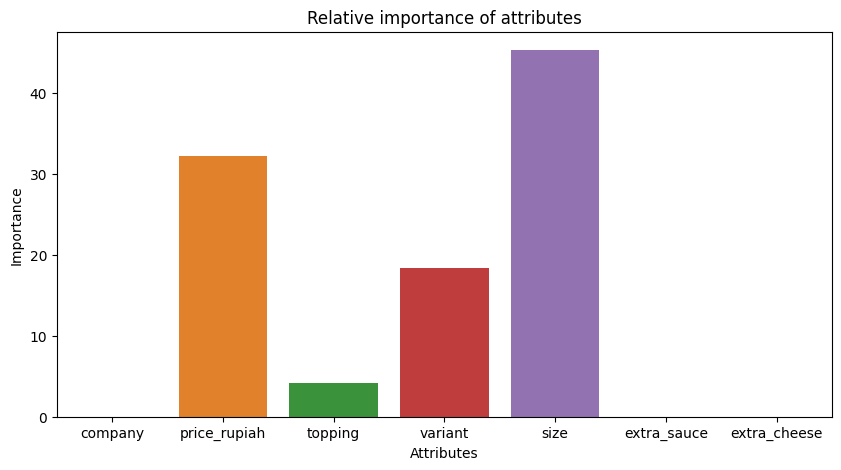

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=conjoint_attributes,y=attribute_importance)
plt.title('Relative importance of attributes')
plt.xlabel('Attributes')
plt.ylabel('Importance')

In [ ]:
utility = []
for i in range(df.shape[0]):
    score = part_worth_dict[df['company'][i]]+part_worth_dict[df['price_rupiah'][i]] +part_worth_dict[df['topping'][i]]+part_worth_dict[df['variant'][i]] +part_worth_dict[df['size'][i]] +part_worth_dict[df['extra_sauce'][i]]+part_worth_dict[df['exttra_cheese'][i]]
    utility.append(score)

df['utility'] = utility
utility

In [ ]:
print("The profile that has the highest utility score :",'\n', df.iloc[np.argmax(utility)])

In [ ]:
for i,j in zip(attrib_level.keys(),range(0,len(conjoint_attributes))):
    print(i)
    level_name[j]
    print("Preferred level in {} is :: {}".format(i,level_name[j][important_levels[i]]))

company
Preferred level in company is :: A
price_rupiah
Preferred level in price_rupiah is :: Rp235,000
topping
Preferred level in topping is :: mushrooms
variant
Preferred level in variant is :: double_mix
size
Preferred level in size is :: jumbo
extra_sauce
Preferred level in extra_sauce is :: no
extra_cheese
Preferred level in extra_cheese is :: yes
